In [2]:
import pandas as pd

# 1. Load emotion log file into data frame
df = pd.read_csv("../emotion_logs/visit_emotions_5classes.csv")     # Change this path as needed. File created by emotion_logger
                                                                    # df stands for "DataFrame"

# preview logged data
df.head()


,patient_id,visit_label,visit_id,timestamp,total_samples,Angry_count,Disgust_count,Happy_count,LowAffect_count,Arousal_count,Angry_pct,Disgust_pct,Happy_pct,LowAffect_pct,Arousal_pct
0,SeanTest,2026-02-03,2026-02-03T11-46-16,2026-02-03T11:46:16,208,9,32,27,102,38,4.33,15.38,12.98,49.04,18.27


In [3]:
# 2. Visualize a single visit

# pick latest visit for a patient
patient_id = "SeanTest"
visit = df[df["patient_id"] == patient_id].sort_values("timestamp").iloc[-1]

# Extract the values
emotion_labels = ["Angry", "Disgust", "Happy", "LowAffect", "Arousal"]

counts = [visit[f"{emo}_count"] for emo in emotion_labels]
percents = [visit[f"{emo}_pct"] for emo in emotion_labels]


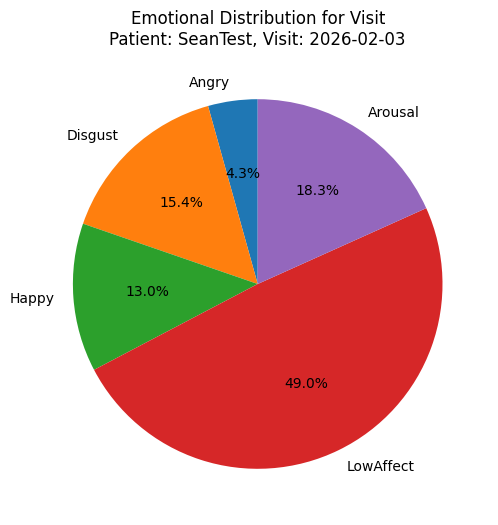

In [4]:
# Pie chart (percentage distribution)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(
    percents,
    labels=emotion_labels,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title(f"Emotional Distribution for Visit\nPatient: {patient_id}, Visit: {visit['visit_label']}")
plt.show()


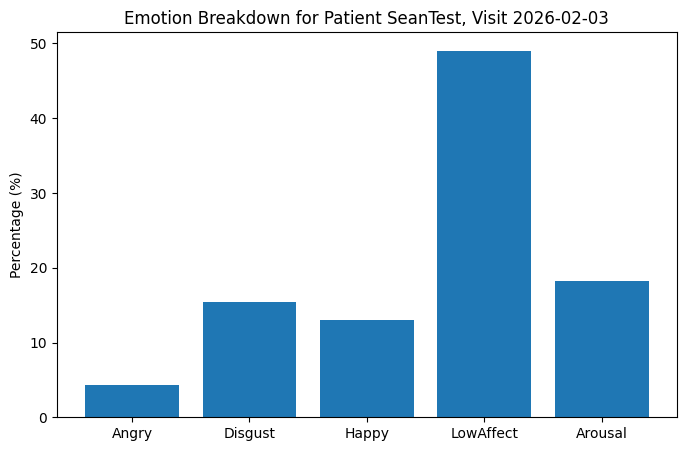

In [5]:
# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(emotion_labels, percents)
plt.ylabel("Percentage (%)")
plt.title(f"Emotion Breakdown for Patient {patient_id}, Visit {visit['visit_label']}")
plt.show()


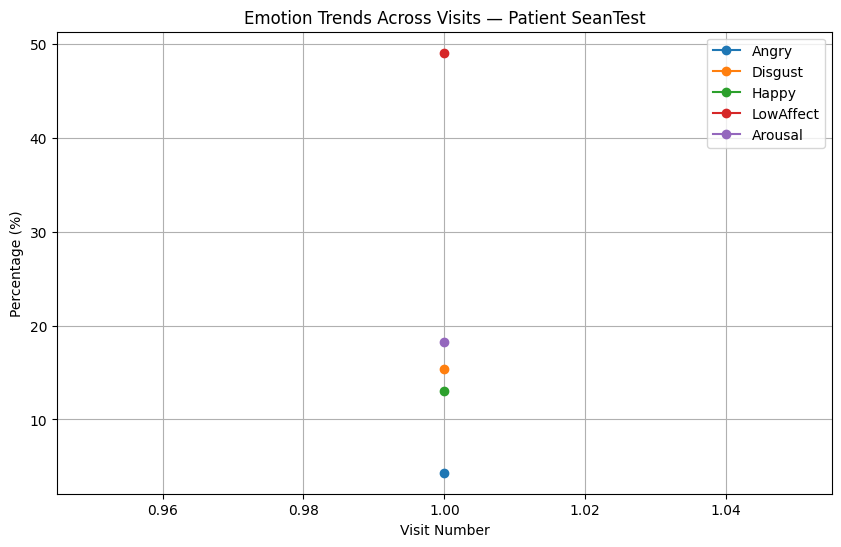

In [6]:
# 3. Serial Trend analysis (Across visit history)

# Sort visits for one patient
patient_df = df[df["patient_id"] == patient_id].sort_values("timestamp").copy()
patient_df["visit_number"] = range(1, len(patient_df) + 1)

# Plot emotion trends over visits
plt.figure(figsize=(10, 6))

for emo in emotion_labels:
    plt.plot(
        patient_df["visit_number"],
        patient_df[f"{emo}_pct"],
        marker="o",
        label=emo
    )

plt.title(f"Emotion Trends Across Visits — Patient {patient_id}")
plt.xlabel("Visit Number")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# 4. Map a dominant emotion per visit

import numpy as np  # optional, but fine to keep

pct_cols = [f"{emo}_pct" for emo in emotion_labels]

patient_df["dominant_emotion"] = (
    patient_df[pct_cols]
    .idxmax(axis=1)
    .str.replace("_pct", "")
)

patient_df[["visit_number", "visit_label", "dominant_emotion"]]


,visit_number,visit_label,dominant_emotion
0,1,11/27/2025,angry
1,2,11/27/2025,sad
2,3,2025-11-29,angry
3,4,2025-11-29,angry
4,5,2025-11-30,angry
5,6,2025-11-30,neutral
